Batch Statistics:-


,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


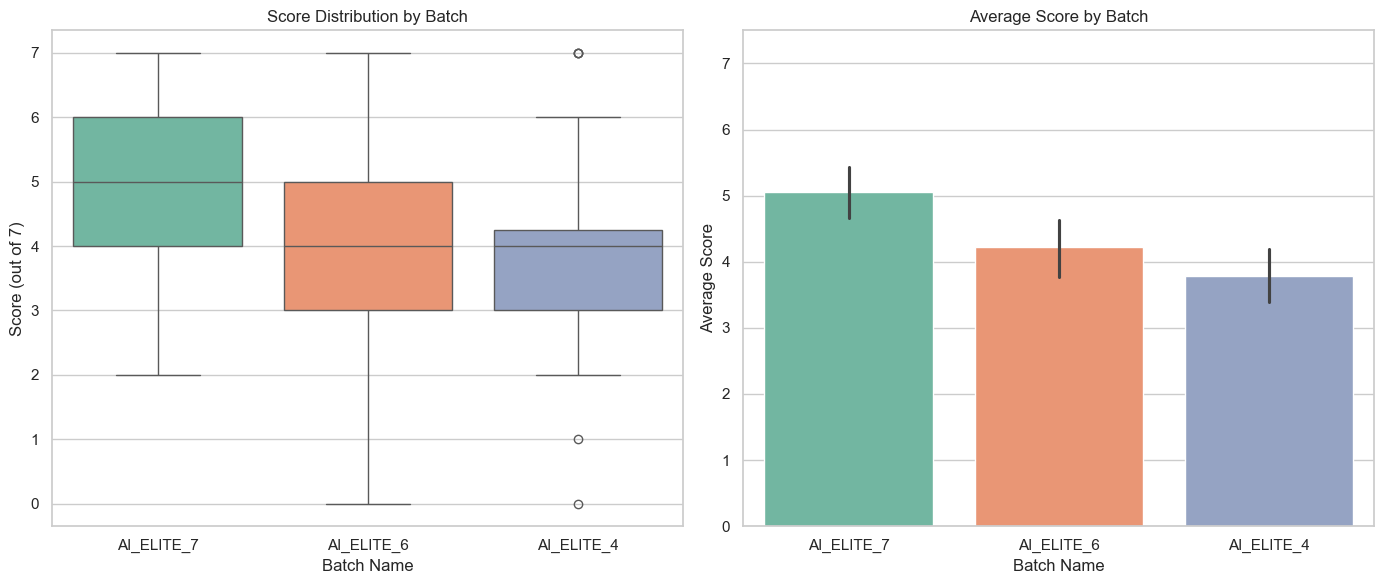


Score Counts per Batch:-


Score_Num,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('scores_data.csv')

# Data Cleaning
# Remove extra whitespace from column names (e.g., ' Batch ' -> 'Batch')
df.columns = df.columns.str.strip()

# Convert the 'Score' column from string format ("6 / 7") to numeric (6)
# We remove the " / 7" suffix and convert the result to an integer
df['Score_Num'] = df['Score'].astype(str).str.replace(' / 7', '', regex=False)
df['Score_Num'] = pd.to_numeric(df['Score_Num'])

# Descriptive Statistics
# Group by 'Batch' to get count, mean, min, max, etc.
batch_stats = df.groupby('Batch')['Score_Num'].describe()
print("Batch Statistics:-")
display(batch_stats)

# Visualization
# Set the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot 1: Box Plot (to see range and outliers)
plt.subplot(1, 2, 1)
sns.boxplot(x='Batch', y='Score_Num', data=df, palette="Set2", hue='Batch', legend=False)
plt.title('Score Distribution by Batch')
plt.xlabel('Batch Name')
plt.ylabel('Score (out of 7)')

# Plot 2: Bar Plot (to compare average performance)
plt.subplot(1, 2, 2)
# Estimator is mean by default, showing confidence intervals
sns.barplot(x='Batch', y='Score_Num', data=df, palette="Set2", hue='Batch', legend=False)
plt.title('Average Score by Batch')
plt.xlabel('Batch Name')
plt.ylabel('Average Score')
plt.ylim(0, 7.5)  # Set y-axis limit slightly above max score for clarity

plt.tight_layout()
plt.show()

# Detailed Score Counts
score_counts = df.groupby(['Batch', 'Score_Num']).size().unstack(fill_value=0)
print("\nScore Counts per Batch:-")
display(score_counts)

# Insights & Observations

Analysis of the ML Test Scores dataset reveals clear trends in performance across the three batches.

Based on the analysis, here are the key insights regarding the three batches (`AI_ELITE_4`, `AI_ELITE_6`, `AI_ELITE_7`):

## 1. Overall Performance Ranking:

- **Best Performer:** `AI_ELITE_7` is the strongest batch. It has the highest average score (**5.06**) and the highest median score (5).

- **Middle Performer:** `AI_ELITE_6` sits in the middle with an average score of **4.23**.

- **Lowest Performer:** `AI_ELITE_4` has the lowest average score of **3.79**.

## 2. Consistency and Spread:

- **`AI_ELITE_7`:** This batch is not only high-performing but also consistent. The minimum score is 2, meaning **no student scored 0 or 1**, unlike the other two batches. A significant portion of the class (23 students) scored a 6 or 7.

- **`AI_ELITE_6`:** This batch has the highest standard deviation (**1.64**), indicating the most variation in student performance. It has scores ranging across the entire spectrum (from 0 to 7).

- **`AI_ELITE_4`:** While the average is lower, the scores are clustered tightly around the score of 4 (19 students scored exactly 4). This suggests the majority of the class is "average," with fewer top performers compared to the other batches.

## 3. Student Count:

- `AI_ELITE_7` is slightly larger with **53 students**, whereas `AI_ELITE_4` and `AI_ELITE_6` both have **48 students**.

---

# Conclusion: 
- The `AI_ELITE_7` batch demonstrates a superior grasp of the material compared to the other two groups, with higher average scores and no extremely low scores.
- `AI_ELITE_6` shows potential but has high variance (a mix of high and low performers), while `AI_ELITE_4` appears to be struggling more generally, with the class average dipping below 4 out of 7.